<h1>Questions to be handed in for project 5 on limits</h1>

<p>To get started, we load the <code>Plots</code> package so that we can make plots.</p>

In [ ]:
using Plots
gadfly()

Plots.GadflyPackage()

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/limits.html">Investigating limits with Julia</a>.</p>

<p>For the impatient, the expression</p>


$$
\lim_{x \rightarrow c} f(x) = L
$$


<p>says that the limit as $x$ goes to $c$ of $f$ is $L$. If $f(x)$ is <em>continuous</em> at $x=c$, the $L=f(c)$. This is almost always the case for a randomly chosen $c$ - but almost never the case for a textbook choice of $c$. There invariably $-$ though not always $-$ we will have <code>f&#40;c&#41; &#61; NaN</code> indicating the function is indeterminate at <code>c</code>. For such cases we need to do more work to identify if any such $L$ exists and when it does, what its value is.</p>

<p>We can investigate limits three ways: analytically, with a table of numbers, or graphically. Here we focus on two ways: graphically or numerically.</p>

<p>Investigating a limit numerically requires us to operationalize the idea of $x$ getting close to $c$ and $f(x)$ getting close to $L$. The first is easy: just create numbers getting close to 0:</p>

In [ ]:
xs = [(1/10)^i for i in 1:10]

10-element Array{Float64,1}:
 0.1    
 0.01   
 0.001  
 0.0001 
 1.0e-5 
 1.0e-6 
 1.0e-7 
 1.0e-8 
 1.0e-9 
 1.0e-10

<p>Then we can investigate limits by looking the corresponding <code>f&#40;x&#41;</code> values. For example, the limit of $\sin(x)/x$ near $0$ is investigated with:</p>

In [ ]:
f(x) = sin(x)/x
ys = [f(x) for x in xs]		# y values. Alternatively ys = map(f, xs)
[xs ys]				# arrange in a table

10x2 Array{Any,2}:
 0.1      0.998334
 0.01     0.999983
 0.001    1.0     
 0.0001   1.0     
 1.0e-5   1.0     
 1.0e-6   1.0     
 1.0e-7   1.0     
 1.0e-8   1.0     
 1.0e-9   1.0     
 1.0e-10  1.0     

<p>From this we see a <em>right</em> limit at 0 appears to be $1$. (Look at what happens to the second column.)</p>

<p>Limits when $c\neq 0$ are similar, but require points getting close to $c$. For example, </p>


$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}
$$


<p>has a limit of $1/2$. We can investigate with:</p>

In [ ]:
hs = [(1/10)^i for i in 1:10]
c = pi/2
xs = c + hs
f(x) = (1 - sin(x))/(pi/2 - x)^2
ys = map(f, xs)     # alternative to [f(x) for x in xs]
[xs ys]

10x2 Array{Float64,2}:
 1.6708   0.499583
 1.5808   0.499996
 1.5718   0.5     
 1.5709   0.5     
 1.57081  0.5     
 1.5708   0.500044
 1.5708   0.4996  
 1.5708   0.0     
 1.5708   0.0     
 1.5708   0.0     

<p>Wait, is the limit $1/2$ or $0$? At first $1/2$ seems like the answer, but the last numbers are $0$.</p>

<p>Here we see a limitation of tables $-$ when numbers get too small, that fact that they are represented in floating point becomes important. In this case, for numbers too close to $\pi/2$ the value on the computer for <code>sin&#40;x&#41;</code> is just 1 and not a number near 1. Hence the denominator becomes $0$, and so then the expression. (Near $1$, the floating point values are about $10^{-16}$ apart, so when two numbers are within $10^{-16}$ of each other, they can be rounded to the same number.)  So watch out when seeing what the values of $f(x)$ get close to. Here it is clear that the limit is heading towards $0.5$ until we get too close.</p>

<p>For convenience, this function can make the above computations easier to do:</p>

In [ ]:
function lim(f::Function, c::Real; n::Int=6, dir="+")
	 hs = [(1/10)^i for i in 1:n] # close to 0
	 if dir == "+"
	   xs = c + hs 
	 else
	   xs = c - hs
	 end
	 ys = map(f, xs)
	 [xs ys]
end

lim (generic function with 1 method)

<p>It use follows the common pattern: <code>action&#40;function, arguments...&#41;</code>. E.g.,</p>

In [ ]:
f(x) = (1 - sin(x))/(pi/2 - x)^2
lim(f, pi/2)

6x2 Array{Float64,2}:
 1.6708   0.499583
 1.5808   0.499996
 1.5718   0.5     
 1.5709   0.5     
 1.57081  0.5     
 1.5708   0.500044

<h4>Graphical approach</h4>

<p>The graphical approach is to plot the expression near $c$ and look visually what $f(x)$ goes to as $x$ gets close to $c$.</p>

<p>A graphical approach doesn't give as many significant digits, but won't have this floating point error. Here is a graph to investigate the same problem. We simply graph near $c$ and look:</p>

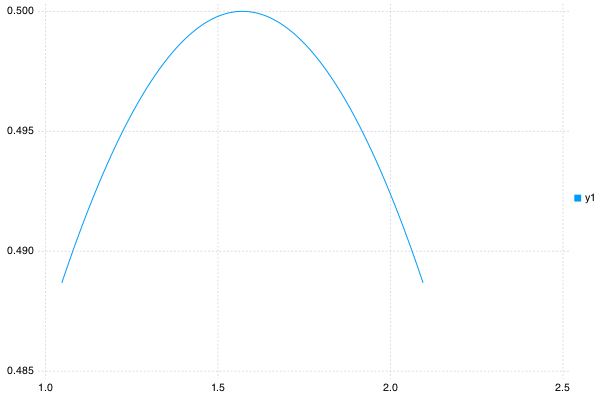

In [ ]:
plot(f, c - pi/6, c + pi/6)

<p>From the graph, we see clearly that as $x$ is close to $\pi/2$, $f(x)$ is close to $1/2$. (The fact that <code>f&#40;pi/2&#41; &#61; NaN</code> will either not come up, as <code>pi/2</code> is not among the points sampled or the <code>NaN</code> values will not be plotted.)</p>

<h2>Questions: Graphical approach</h2>

<ul>
<li>Plot the function to estimate the limit. What is the value?</li>
</ul>


$$
\lim_{\theta \rightarrow 0} \frac{\sin(5\theta)}{\sin(2\theta)}.
$$


<ul>
<li>Plot a function to estimate the limit. What is the value?</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{2^x - \cos(x)}{x}.
$$


<ul>
<li>Plot the function to estimate the limit. What is the value?</li>
</ul>


$$
\lim_{\theta \rightarrow 0} \frac{\sin^2(4\theta)}{\cos(\theta) - 1}.
$$


<h2>Questions: Tables</h2>

<ul>
<li>This expression is indeterminate at $0$ of the type $0/0$:</li>
</ul>


$$
\frac{1-\cos(x)}{x}.
$$


<p>What value does <code>julia</code> return if you try to evaluate it a 0?</p>

<ul>
<li>This expression is indeterminate at $0$ of the type $0 \cdot \infty$:</li>
</ul>


$$
x\log(x).
$$


<ul>
<li>This expression is indeterminate at $0$ of the type $0^0$:</li>
</ul>


$$
x^{1/\log(x)}.
$$


<p>What value does <code>julia</code> return?</p>

<ul>
<li>This expression is indeterminate at at $\pi/2$ of the type $0/0$. </li>
</ul>


$$
\frac{cos(x)}{\pi/2 - x}
$$


<p>What value does <code>julia</code> return?</p>

<ul>
<li> Find the limit using a table. Show your commands. </li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\cos(x) - 1}{x}.
$$


<p>What is the estimated value? </p>

<ul>
<li> Find the limit using a table. What is the estimated value?</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\sin(5x)}{x}.
$$


<ul>
<li>Find the limit using a table. What are your commands? What is the estimated value? (You need    values getting close to $3$ not $0$.)</li>
</ul>


$$
\lim_{x \rightarrow 3} \frac{x^3 - 2x^2 -9}{x^2 - 2x -3}.
$$


<p>The commands are:</p>

<p>The value is:</p>

<ul>
<li>Find this limit using a table. What is the estimated value?</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{\sin^{-1}(4x)}{\sin^{-1}(5x)}
$$


<ul>
<li>Find the <em>left</em> limit of <code>f&#40;x&#41; &#61; cos&#40;pi/2*&#40;x - floor&#40;x&#41;&#41;&#41;</code> as $x$    goes to $2$. </li>
</ul>

<ul>
<li>Find the limit using a table. What is the estimated value? Recall,    <code>atan</code> and <code>asin</code> are the names for the appropriate inverse    functions.</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\tan^{-1}(x) - 1}{\sin^{-1}(x) - 1}.
$$


<h2>Symbolic limits</h2>

<p>The add-on package <code>SymPy</code> can compute the limit of a simple algebraic function of a single variable quite well. The package is loaded with:</p>

In [ ]:
using SymPy

<p>The <code>limit</code> function is called just as our <code>lim</code> function is above. For example:</p>

In [ ]:
f(x) = sin(x)/x
limit(f, 0)

<p>Alternatively, you can use a symbolic expression, not a function, but then you need to specify which variable, as in <code>limit&#40;sin&#40;x&#41;/x, x, 0&#41;</code>.</p>

<ul>
<li>Find this limit using <code>SymPy</code> (use a decimal value for your answer, not a fraction):</li>
</ul>


$$
\lim_{x \rightarrow 3} \frac{1/x - 1/3}{x^2 - 9}.
$$


<ul>
<li>Find this limit using <code>SymPy</code>:</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{\sin(x^2)}{x\tan(x)}.
$$


<ul>
<li> Find the limit using <code>SymPy</code>. What is the estimated value?</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{x - \sin(|x|)}{x^3}.
$$


<h2>Other questions</h2>

<ul>
<li>Let <code>f&#40;x&#41; &#61; sin&#40;sin&#40;x&#41;^2&#41; / x^k</code>. Consider $k=1$, $2$, and $3$. For   which of values of $k$ does the limit at $0$ <strong>not</strong> exist? (Repeat   the problem for the 3 different values.)</li>
</ul>

<ul>
<li>Let <code>l&#40;x&#41; &#61; &#40;a^x - 1&#41;/x</code> and <em>define</em> $L(a) = \lim_{x\rightarrow 0} l(x,a)$.</li>
</ul>

<p>Show that $L(3 \cdot 4) = L(3) + L(4)$ by computing all three limits numerically. (In general, you can show algebraically that $L(a\cdot b) = L(a) + L(b)$ like a logarithm. Show your work.</p>